## Detect SVs in in cooler file

Installation process is demonstrated below (example on Windows)

In [14]:
!pip install dist/hict_patterns-0.1.cpu-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Processing d:\study\hict\hict_patterns\dist\hict_patterns-0.1.cpu-py3-none-any.whl
hict-patterns is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
!pip install dist/hict_patterns-0.1-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Processing d:\study\hict\hict_patterns\dist\hict_patterns-0.1-py3-none-any.whl
     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     -------- ----------------------------- 122.9/536.2 kB 7.5 MB/s eta 0:00:01
     ----------------------------- -------- 409.6/536.2 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 536.2/536.2 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/247.7 kB ? eta -:--:--
     ------------------------------------- 247.7/247.7 kB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     -------------------------------------- 133.1/133.1 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------

You need to specify the path to the cooler file in .mcool format ([how to convert .cool to .mcool](https://cooler.readthedocs.io/en/latest/api.html#cooler.zoomify_cooler)). Also, you could provide the name of device on which you prefer to perform calculations (CPU or GPU) and batch size for operations with CNN. You could provide flag: '--search_in_1k' to perform additional stage for detection with max precesion. Do this only if your .mcool file has Hi-C map in the 1kb resolution.

In [6]:
!hict_patterns data\dong_vs_colluzzi\dong_colluzzii.mcool  --search_in_1k --device CPU

Started Stage 1
Stage 1 dataset loaded
Started Stage 2
Stage 2 dataset loaded
Started Stage 3
Stage 3 dataset loaded
Started Stage 4
Stage 4 dataset loaded
Started Stage 4.5
Started Stage 5
Started Stage 6
Detection finished! Results are in result.csv
Executed in 461.7 seconds



100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

100%|██████████| 282/282 [04:37<00:00,  1.01it/s]

100%|██████████| 17/17 [01:52<00:00,  6.59s/it]

100%|██████████| 77/77 [01:01<00:00,  1.25it/s]

100%|██████████| 16/16 [00:00<00:00, 81.94it/s]

100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

100%|██████████| 16/16 [00:00<00:00, 48.67it/s]


Function returns list of coordinates of detected SVs, which could be visualised this way:

In [ ]:
!pip install matplotlib

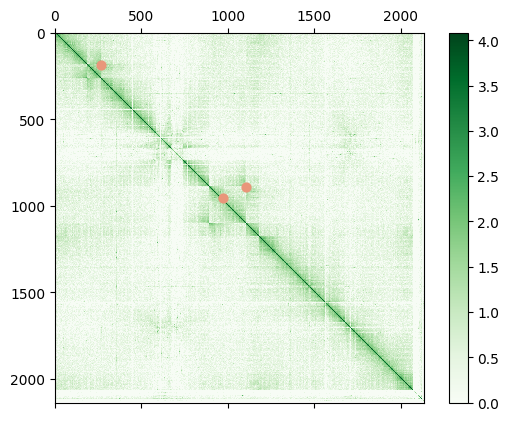

In [12]:
import cooler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

visualisation_resolution = 100000
results = pd.read_csv('result.csv')
c = cooler.Cooler(f'data\dong_vs_colluzzi\dong_colluzzii.mcool::/resolutions/{visualisation_resolution}')
matrix = c.matrix(balance=False)[:]

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap='Greens')
fig.colorbar(im)

plt.scatter(results['bp_1']//visualisation_resolution, results['bp_2']//visualisation_resolution, s=40, c='#E9967A')